In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

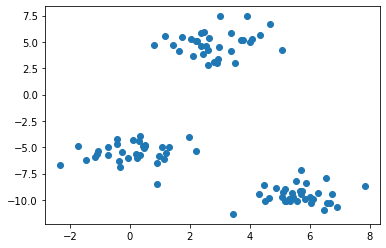

In [32]:
x,y = make_blobs(random_state=10,
                n_samples = 100, # 행 개수
                n_features = 2, # 열 개수
                centers=3) # 중심 개수
plt.scatter(x[:,0], x[:,1])

## KMeans

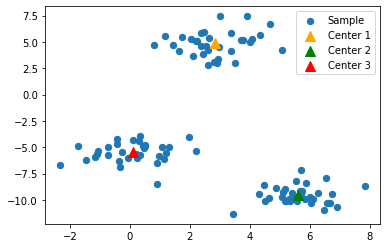

In [33]:
from sklearn.cluster import KMeans
color = ['orange', 'green', 'red']

K = KMeans(n_clusters=3).fit(x)
plt.scatter(x[:,0], x[:,1], s=40, label = 'Sample')

# 군집별 중심점
centers = K.cluster_centers_

for idx, center in enumerate(centers):
    plt.scatter(center[0], center[1], s=100,
               label = f'Center {idx+1}', c = color[idx], marker='^')
plt.legend()
plt.show()

## KMeans 
- make moons : 한 점을 기준으로 반경겨리 안에 점이 n개이상 있으면 군집으로 인식

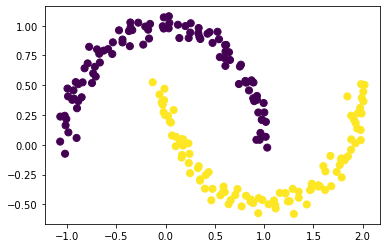

In [34]:
from sklearn.datasets import make_moons

# 2개의 특성을 가지는 200개의 데이터 생성
x, y = make_moons(200,noise = .05, random_state=0)

plt.scatter(x[:,0], x[:,1], c=y, s=50)

## DBSCAN
- 모든 데이터를 하나의 군집으로 지정

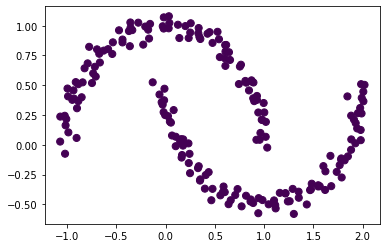

In [35]:
from sklearn.cluster import DBSCAN
labels = DBSCAN().fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=labels, s=50)

In [38]:
# StandardScaler를 이용해 데이터 표준화

from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

# 평균, 표준편차
x_scaled.mean(axis =0), x_scaled.std(axis=0)

(array([ 1.37667655e-16, -1.32671651e-16]), array([1., 1.]))

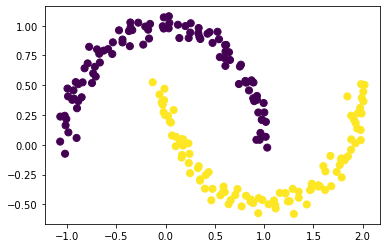

In [39]:
# 표준화된 데이터 재군집

labels = DBSCAN().fit_predict(x_scaled)
plt.scatter(x[:,0], x[:,1], c=labels, s=50)

## 손글씨 데이터 KMeans, DBSCAN

In [52]:
import numpy as np
from sklearn import cluster
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits['data']
Y = digits['target']

x_tr, x_te, y_tr, y_te = train_test_split(X,Y,random_state=0, test_size=0.3)

n_samples ,n_features = x_tr.shape
n_digits = len(np.unique(y_tr))
labels = y_tr

clf = cluster.KMeans(init='k-means++', n_clusters = 10, random_state=0)
clf.fit(x_tr)

KMeans(algorithm='auto', copy_x=True, init='k-means++',max_iter=300,
      n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
      random_state=0,tol=0.0001, verbose=0)

KMeans(n_clusters=10, n_jobs=1, precompute_distances='auto', random_state=0)

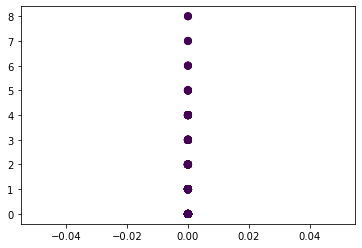

In [50]:
x_scaled = StandardScaler().fit_transform(x_tr)
labels = DBSCAN().fit_predict(x_scaled)
plt.scatter(x_tr[:,0], x_tr[:,1], c=labels, s=50)